In [1]:
import numpy as np
import pandas as pd
import shap

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

from xgboost import XGBRegressor

from models import *
from util import *

from feature_selector import FeatureSelector

In [2]:
ntfm_tsfresh = get_problem_features()
ntfm_catch22 = get_problem_features('m4-catch22features.csv')
ntfm = ntfm_tsfresh.join(ntfm_catch22)

pdf = get_problem_algorithm_performance()

drop_columns = find_correlation(ntfm, thresh=0.6)

ntfm = ntfm.drop(columns=drop_columns)


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

X = ntfm.to_numpy()
Y = pdf.to_numpy()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2002)

y_train = Y_train[:, 0]
y_test = Y_test[:, 0]


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
#sorted(ntfm.columns)

In [4]:
#drop_columns = find_correlation(ntfm)
#sorted(drop)

In [5]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, metric='cosine').fit_transform(X_train.T)
X_embedded.shape

'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.


(93, 2)

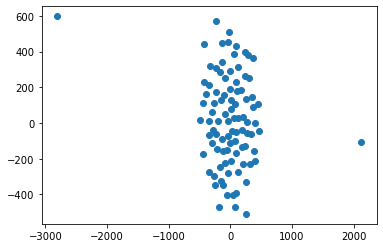

In [6]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
#X_embedded[:, 0].shape

In [7]:
corr = spearmanr(X).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

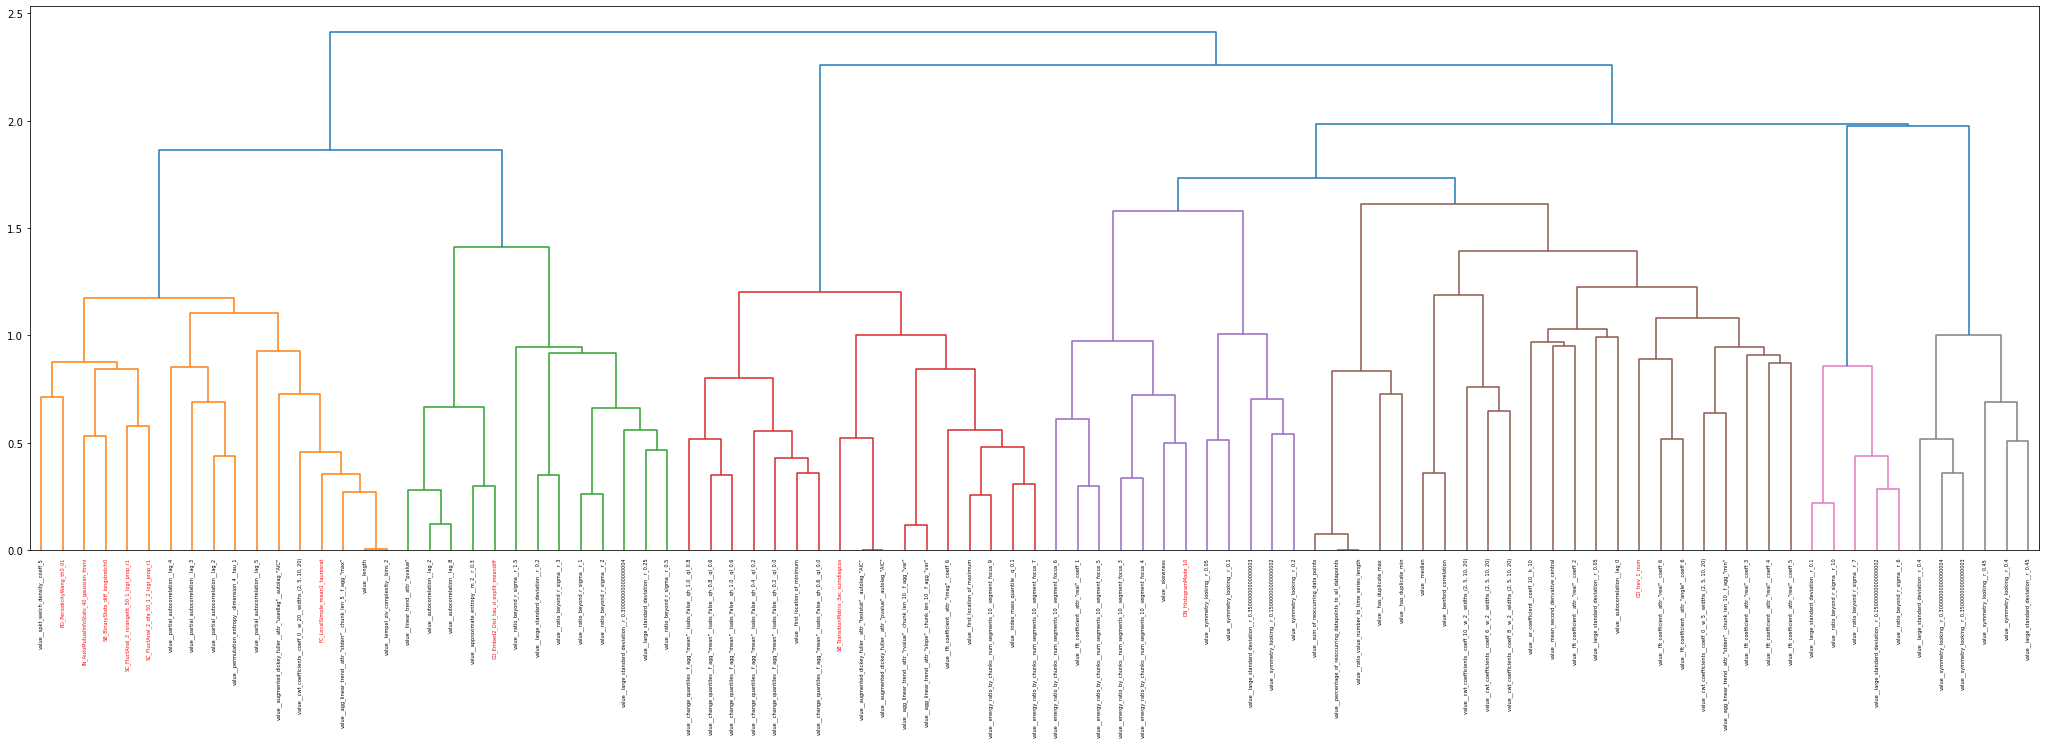

In [8]:
fig, ax1 = plt.subplots(1, 1, figsize=(36, 10))

distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=ntfm.columns, ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

for xtick, name in zip(ax1.get_xticklabels(), dendro["ivl"]):
    if name in ntfm_tsfresh.columns:
        xtick.set_color('black')
    else:
        xtick.set_color('red')

plt.show()

In [9]:
fig, ax1 = plt.subplots(1, 1, figsize=(30, 30))
ax1.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax1.set_xticks(dendro_idx)
ax1.set_yticks(dendro_idx)
ax1.set_xticklabels(dendro["ivl"], rotation="vertical")
ax1.set_yticklabels(dendro["ivl"])
fig.tight_layout()


for xtick, name in zip(ax1.get_xticklabels(), dendro["ivl"]):
    if name in ntfm_tsfresh.columns:
        xtick.set_color('black')
    else:
        xtick.set_color('red')
        
for ytick, name in zip(ax1.get_yticklabels(), dendro["ivl"]):
    if name in ntfm_tsfresh.columns:
        ytick.set_color('black')
    else:
        ytick.set_color('red')

plt.show()

In [10]:
corr.shape

(93, 93)

In [11]:
corr = spearmanr(Y).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

In [12]:
fig, ax1 = plt.subplots(1, 1, figsize=(36, 10))

distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=pdf.columns, ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

#for xtick, name in zip(ax1.get_xticklabels(), dendro["ivl"]):
#    if name in ntfm_tsfresh.columns:
#        xtick.set_color('black')
#    else:
#        xtick.set_color('red')

plt.show()

In [13]:
fig, ax1 = plt.subplots(1, 1, figsize=(20, 20))
ax1.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax1.set_xticks(dendro_idx)
ax1.set_yticks(dendro_idx)
ax1.set_xticklabels(dendro["ivl"], rotation="vertical")
ax1.set_yticklabels(dendro["ivl"])
fig.tight_layout()


#for xtick, name in zip(ax1.get_xticklabels(), dendro["ivl"]):
#    if name in ntfm_tsfresh.columns:
#        xtick.set_color('black')
#    else:
#        xtick.set_color('red')
#        
#for ytick, name in zip(ax1.get_yticklabels(), dendro["ivl"]):
#    if name in ntfm_tsfresh.columns:
#        ytick.set_color('black')
#    else:
#        ytick.set_color('red')

plt.show()

In [24]:
fig, ax1 = plt.subplots(1, 1, figsize=(20, 20))

plt.imshow(pdf.sample(100).to_numpy())
plt.colorbar()

In [50]:
ntfm.columns.to_list()

['value__has_duplicate_max',
 'value__has_duplicate_min',
 'value__has_duplicate',
 'value__sum_values',
 'value__abs_energy',
 'value__mean_abs_change',
 'value__mean_change',
 'value__mean_second_derivative_central',
 'value__median',
 'value__mean',
 'value__length',
 'value__standard_deviation',
 'value__variation_coefficient',
 'value__variance',
 'value__skewness',
 'value__kurtosis',
 'value__root_mean_square',
 'value__absolute_sum_of_changes',
 'value__longest_strike_below_mean',
 'value__longest_strike_above_mean',
 'value__count_above_mean',
 'value__count_below_mean',
 'value__last_location_of_maximum',
 'value__first_location_of_maximum',
 'value__last_location_of_minimum',
 'value__first_location_of_minimum',
 'value__percentage_of_reoccurring_values_to_all_values',
 'value__percentage_of_reoccurring_datapoints_to_all_datapoints',
 'value__sum_of_reoccurring_values',
 'value__sum_of_reoccurring_data_points',
 'value__ratio_value_number_to_time_series_length',
 'value__max

In [42]:
pdf.columns

Index(['005', '009', '024', '030', '036', '039', '043', '069', '070', '072',
       '078', '082', '091', '104', '106', '118', '126', '132', '169', '191',
       '211', '212', '216', '218', '219', '223', '225', '227', '231', '234',
       '235', '236', '237', '238', '239', '241', '243', '244', '245', '248',
       '249', '250', '251', '252', '253', '255', '256', '258', '260', 'ARIMA',
       'Com', 'Damped', 'ETS', 'Holt', 'MLP', 'Naive', 'Naive2', 'RNN', 'SES',
       'Theta', 'sNaive'],
      dtype='object', name='Algorithm')

0.17782333924708058


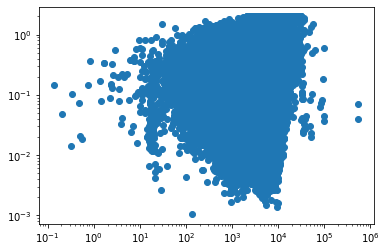

In [58]:
from scipy.stats.stats import pearsonr

ap = ntfm['value__agg_linear_trend__attr_"intercept"__chunk_len_10__f_agg_"max"'].to_numpy()
pp = pdf['RNN'].to_numpy()

print(pearsonr(ap,pp)[0])

plt.scatter(ap, pp)
plt.yscale('log')
plt.xscale('log')

In [66]:
l = []
for c in ntfm.columns.to_list():
    ap = ntfm[c].to_numpy()
    pp = pdf['RNN'].to_numpy()
    #print(c, pearsonr(ap,pp)[0])
    l.append((pearsonr(ap,pp)[0], c))
sorted(l, reverse=True)

[(0.35965859751836937, 'value__variation_coefficient'),
 (0.3519054754284147,
  'value__energy_ratio_by_chunks__num_segments_10__segment_focus_0'),
 (0.3484054440226943,
  'value__energy_ratio_by_chunks__num_segments_10__segment_focus_1'),
 (0.34667659946359763, 'DN_OutlierInclude_n_001_mdrmd'),
 (0.3292852397840729, 'value__last_location_of_minimum'),
 (0.32226706921200476, 'value__first_location_of_minimum'),
 (0.3030256940893994,
  'value__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)'),
 (0.29932013587558376,
  'value__cwt_coefficients__coeff_1__w_20__widths_(2, 5, 10, 20)'),
 (0.29892314079980775,
  'value__energy_ratio_by_chunks__num_segments_10__segment_focus_2'),
 (0.2929546836322712,
  'value__cwt_coefficients__coeff_2__w_20__widths_(2, 5, 10, 20)'),
 (0.28498048453237557,
  'value__cwt_coefficients__coeff_3__w_20__widths_(2, 5, 10, 20)'),
 (0.2786981727076391,
  'value__agg_linear_trend__attr_"stderr"__chunk_len_10__f_agg_"mean"'),
 (0.27635094460570037,
  'value__cw